In [1]:
install.packages("readxl")
install.packages("tibble")


package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpaygsQf\downloaded_packages
package 'tibble' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpaygsQf\downloaded_packages


In [1]:
# 加载必要的库
library(ggplot2)
library(readxl)
library(tibble)
library(dplyr)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
file_path <- "international-travel-june-2020.xlsx"
data <- read_excel(file_path, sheet = "Table 1")

data <- as_tibble(data)


New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`


In [4]:
total_rows <- nrow(data)
print(data, n=total_rows)


# A tibble: 46 × 15
   `Table 1`   ...2  ...3  ...4  ...5  ...6  ...7  ...8  ...9  ...10 ...11 ...12
   <chr>       <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr>
 1 Internatio… NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 2 By directi… NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 3 Period      Stat… Arri… NA    NA    NA    NA    NA    Depa… NA    NA    NA   
 4 NA          NA    Inte… NA    NA    Outc… NA    Tota… Inte… NA    NA    Outc…
 5 NA          NA    Over… NZ-r… Resi… Shor… Long… NA    Over… NZ-r… Resi… Shor…
 6 Series ref… NA    SVAZA SRAZA NA    NA    SEMA… STZAA SVDZA SRDZA NA    NA   
 7 June month  NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 8 2010        F     1458… 1641… 5201  3084… 6709  3151… 1336… 1988… 5934  3301…
 9 2011        F     1312… 1686… 5436  2988… 6585  3053… 1264… 1924… 6927  3166…
10 2012        F     1510… 1734… 6049  3233… 7273  3305… 1381… 2210… 7078  3568…
11 2013 

In [6]:
glimpse(data)

Rows: 46
Columns: 15
$ `Table 1` <chr> "International travel and migration summary", "By direction …
$ ...2      <chr> NA, NA, "Status of estimated migration(1)", NA, NA, NA, NA, …
$ ...3      <chr> NA, NA, "Arrivals", "Intentions-based measure(2)", "Overseas…
$ ...4      <chr> NA, NA, NA, NA, "NZ-resident travellers(5)", "SRAZA", NA, "1…
$ ...5      <chr> NA, NA, NA, NA, "Residual(6)", NA, NA, "5201", "5436", "6049…
$ ...6      <chr> NA, NA, NA, "Outcomes-based measure(3)", "Short-term movemen…
$ ...7      <chr> NA, NA, NA, NA, "Long-term movements (migrant arrivals)(7)",…
$ ...8      <chr> NA, NA, NA, "Total movements(8)", NA, "STZAA", NA, "315185",…
$ ...9      <chr> NA, NA, "Departures", "Intentions-based measure(2)", "Overse…
$ ...10     <chr> NA, NA, NA, NA, "NZ-resident travellers(10)", "SRDZA", NA, "…
$ ...11     <chr> NA, NA, NA, NA, "Residual(6)", NA, NA, "5934", "6927", "7078…
$ ...12     <chr> NA, NA, NA, "Outcomes-based measure(3)", "Short-term movemen…
$ ...13     <chr> N

In [7]:
# Year ended June
data <- data[(21:31), ]


In [8]:
# Arrivals
data_Arrivals <- data %>% select(1:8)

names(data_Arrivals) <- c("Period", "Status", "OverseasVisitors", "NZResidents", "Residual", "Short-term movements", "Long-term movements", "Total movements")

# data_Arrivals <- data_Arrivals %>% select_if(~!all(is.na(.)))

data_Arrivals <- data_Arrivals %>%
  mutate_at(vars(-"Status"), as.integer)

# glimpse(data_Arrivals)

options(data_Arrivals.width = Inf)

data_Arrivals %>%
  select_all() %>%
  print()

# A tibble: 11 × 8
   Period Status OverseasVisitors NZResidents Residual `Short-term movements`
    <int> <chr>             <int>       <int>    <int>                  <int>
 1   2010 F               2501264     1965101    82305                4446884
 2   2011 F               2501303     2078575    84016                4562868
 3   2012 F               2635726     2133887    84402                4753049
 4   2013 F               2636896     2182967    88235                4801776
 5   2014 F               2786826     2279597   100784                5046669
 6   2015 F               2991854     2390007   115655                5361572
 7   2016 F               3310390     2537045   125055                5826154
 8   2017 F               3648204     2749666   131355                6384471
 9   2018 F               3786927     2920193   129536                6695705
10   2019 P               3889798     3073219   111969                6933345
11   2020 P               2919122     2323853

In [9]:
# Departures
data_Departures <- data %>% select(1, 2, 9:14)

names(data_Departures) <- c("Period", "Status", "OverseasVisitors", "NZResidents", "Residual", "Short-term movements", "Long-term movements", "Total movements")

# data_Arrivals <- data_Arrivals %>% select_if(~!all(is.na(.)))

data_Departures <- data_Departures %>%
  mutate_at(vars(-"Status"), as.integer)

# glimpse(data_Departures)

options(data_Departures = Inf)

data_Departures %>%
  select_all() %>%
  print()

# A tibble: 11 × 8
   Period Status OverseasVisitors NZResidents Residual `Short-term movements`
    <int> <chr>             <int>       <int>    <int>                  <int>
 1   2010 F               2513574     1968175    65801                4454655
 2   2011 F               2527812     2066696    80149                4564358
 3   2012 F               2648286     2153586    87593                4774001
 4   2013 F               2655934     2140653    80328                4771422
 5   2014 F               2839951     2236607    62446                5051522
 6   2015 F               3051740     2335276    57396                5361157
 7   2016 F               3375380     2464066    55965                5812923
 8   2017 F               3651665     2746295    59050                6370762
 9   2018 F               3823916     2933031    64541                6729159
10   2019 P               3851020     3153813    20961                6936487
11   2020 P               2910948     2258828

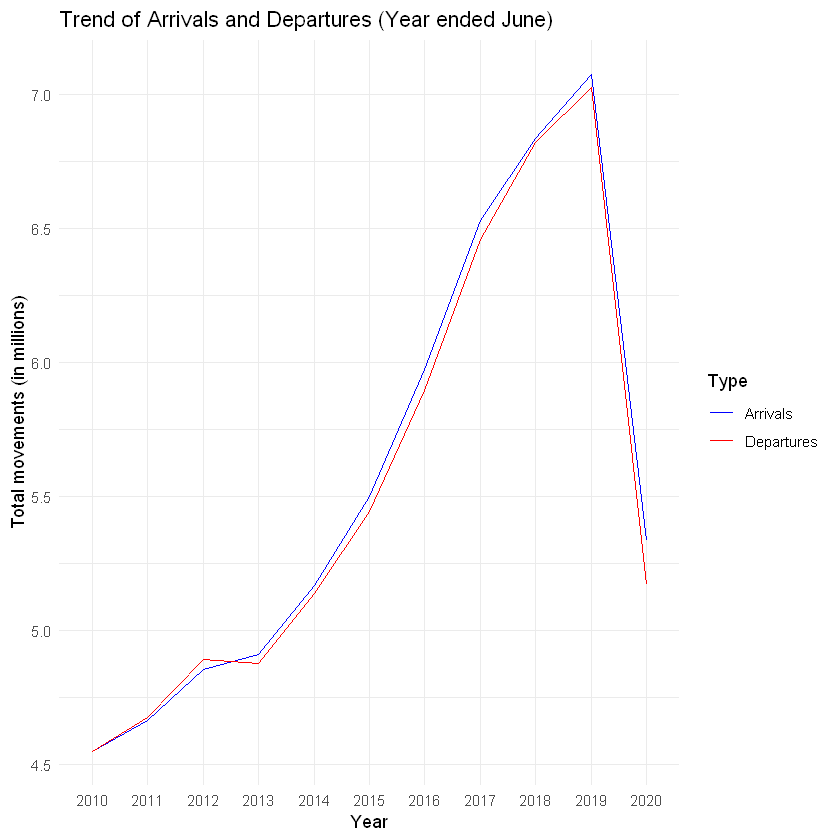

In [21]:
# Merge two data frames
combined_data <- bind_rows(
  data_Arrivals %>% select(Period, `Total movements`) %>% mutate(Type = "Arrivals"),
  data_Departures %>% select(Period, `Total movements`) %>% mutate(Type = "Departures")
)

# Convert Total movements to millions of units
combined_data$`Total movements` <- combined_data$`Total movements` / 1e6

ggplot(combined_data, aes(x = factor(Period), y = `Total movements`, color = Type, group = Type)) +
  geom_line() +
  labs(title = "Trend of Arrivals and Departures (Year ended June)", 
       x = "Year", 
       y = "Total movements (in millions)") +
  theme_minimal() +
  scale_color_manual(values = c("Arrivals" = "blue", "Departures" = "red"))



# ggsave(plot_Trend,filename = "Trend of Arrivals and Departures.jpg")

[1] "在大多数年份中，新西兰吸引了更多的人口，净移民人数为正。"

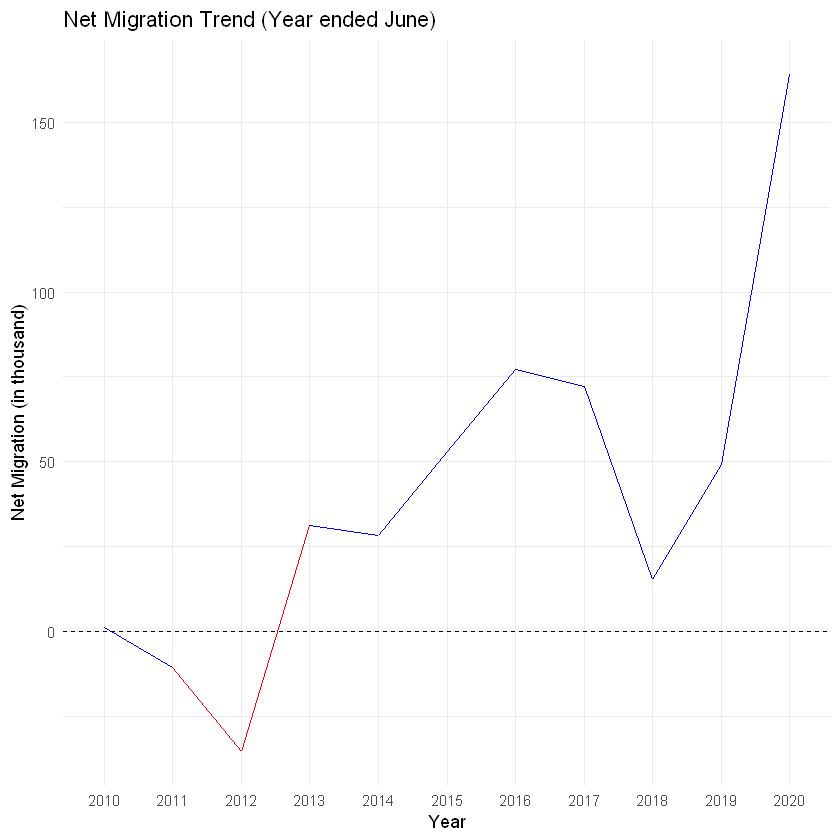

In [20]:
# The net difference between the total number of people entering and leaving New Zealand, including travelers and immigrants.
net_migration <- data_Arrivals %>% 
  select(Period, Arrivals = `Total movements`) %>%
  left_join(data_Departures %>% select(Period, Departures = `Total movements`), by = "Period") %>%
  mutate(NetMigration = Arrivals - Departures)

# Convert Total movements to thousands units
net_migration$`NetMigration` <- net_migration$`NetMigration` / 1000

ggplot(net_migration, aes(x = factor(Period), y = NetMigration)) +
  geom_line(group = 1, color = ifelse(net_migration$NetMigration >= 0, "blue", "red")) +
  geom_hline(yintercept = 0, linetype = "dashed") + 
  labs(title = "Net Migration Trend (Year ended June)", 
       x = "Year", 
       y = "Net Migration (in thousand)") +
  theme_minimal()


# if (mean(net_migration$NetMigration) > 0) {
#   conclusion <- "在大多数年份中，新西兰吸引了更多的人口，净移民人数为正。"
# } else {
#   conclusion <- "在大多数年份中，新西兰流失了更多的人口，净移民人数为负。"
# }
# conclusion

# ggsave(plot0,filename = "p.jpg")


这张“Net Migration Trend (Year ended June)”图显示了从2010年到2020年的新西兰净移民趋势。从图中我们可以观察到以下几点并得出相关结论：

1. **负净移民期**：从2010年到约2013年中，净移民人数为负（用红线表示），说明在这段时间内，新西兰的离境人数超过了入境人数。这意味着新西兰在这段时间里流失了人口。

2. **正净移民期的开始**：从2013年开始，净移民数开始增加并在接下来的几年内保持正增长。这说明从这个时间点开始，新西兰吸引了更多的人口，入境人数超过了离境人数。

3. **净移民数的波动**：在2015年到2018年之间，净移民数经历了一些波动，但总体上保持正增长。

4. **显著增长**：从2018年开始，净移民数呈现显著的增长，直到2020年。这可能意味着新西兰在这段时间里对外国人更有吸引力，或者国内的经济、社会和政治环境发生了积极的变化，导致更多人选择移民到新西兰。

**结论**：
- 在2010年到2013年之间，新西兰流失了人口，但从2013年开始，情况发生了逆转，新西兰开始吸引更多的移民。
- 从2018年到2020年，新西兰的净移民数急剧上升，这可能是由于某些有利条件或策略导致的。
- 整体上，从图中可以看出，在过去十年中，新西兰的净移民数从负增长转为正增长，并在近几年呈现出强劲的增长趋势。

为了更全面地解释这一趋势，可能还需要考虑其他外部因素，例如全球经济趋势、新西兰的政策变化或其他可能影响移民的因素。